# Interactive Dashboard

- We built a daily peak usage dashboard and a customer segmentation dashboard. Our daily peak usage widget digs 
further into the trip data of any Bike-share station of our choice and finds the total number of trips and average
duration (in minutes) of those trips, grouped by hour. This widget visualizes the results using a scatterplot graph, with the hour as the x-axis, number of trips as the y-axis, and the average duration as the scatterplot size. Our Customer Segmentation Usage widget digs further into the trip data of any Bike-share station of our choice and finds the total number of trips and average duration (in minutes) of those trips, grouped by hour and subscriber type. The widget as well displays the total number of trips, grouped by day of week and subscriber type, and the mean duration of trips, grouped by day of week and subscriber type.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline 

/Users/michaelosorio/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('201408_trip_data.csv')

def hr_func(ts):
    return ts.hour

df['Start Hour'] = pd.to_datetime(df['Start Date']).apply(hr_func)
df['Day of Week'] = pd.to_datetime(df['Start Date']).dt.dayofweek

# Top 10 Start BikeShare Stations

* As as a point of reference, we suggest inputting these staion names into our widgest to investigate the bike-share activity at these stations:
    1. San Francisco Caltrain (Townsend at 4th)
    2. Harry Bridges Plaza (Ferry Building)
    3. Embarcadero at Sansome
    4. San Francsico Caltrain 2 (330 Townsend)
    5. 2nd at Townsend
    6. Market at Sansome
    7. Temporary Transbay Terminal (Howard at Beale)
    8. Steuart at Market
    9. Townsend at 7th
    10. Market at 4th

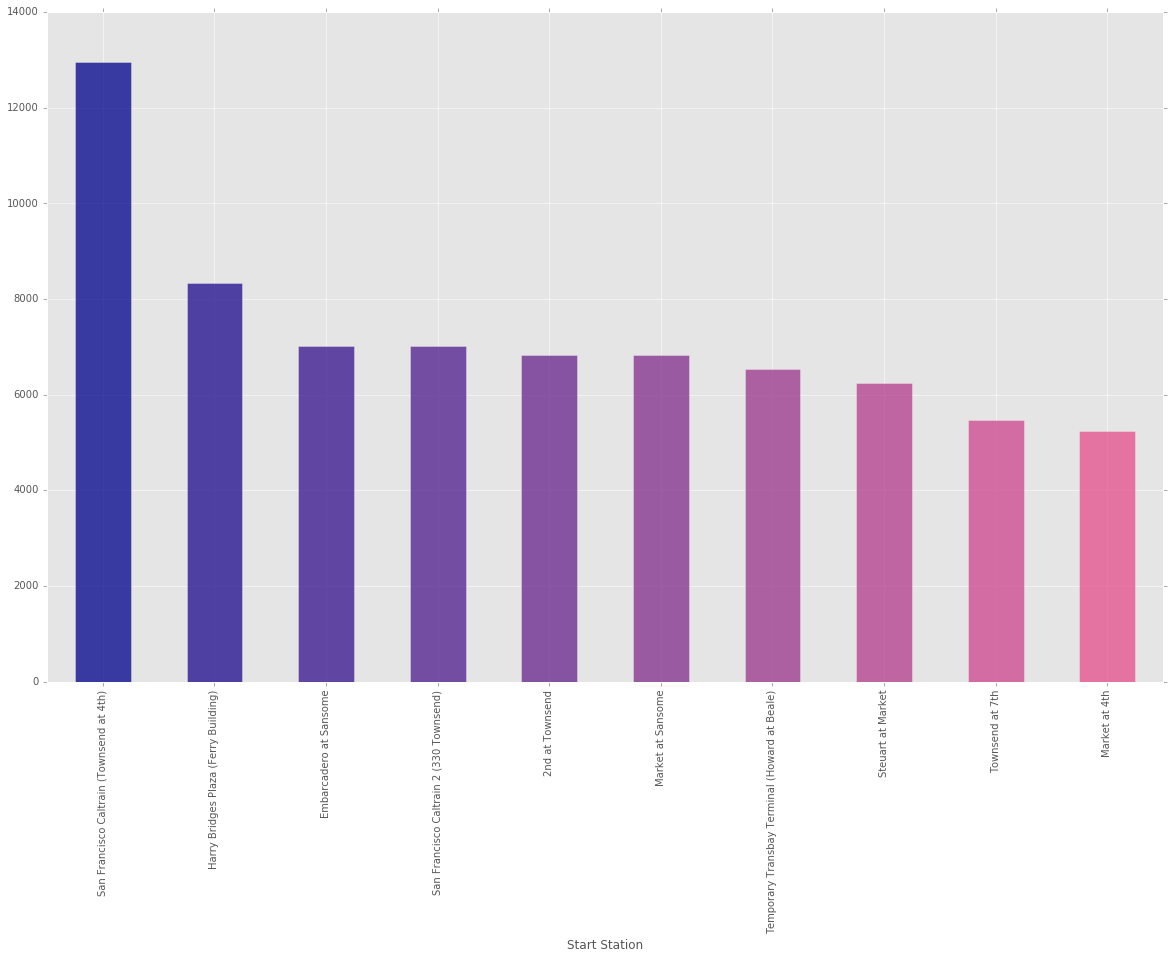

In [3]:
start_stations = df.groupby('Start Station').size()
top10_start = start_stations.nlargest(10)
my_colors = [(x/10.0, x/30.0, 0.55) for x in range(len(top10_start))]
top10_start.plot(kind = 'bar', figsize = (20, 12), color=my_colors, alpha = 0.75)

In [4]:
from ipywidgets import *
from IPython.display import display, clear_output
from IPython.html import widgets

/Users/michaelosorio/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Daily Peak Usage Dashboard

- Our Daily Peak Usage widget digs further into the trip data of any Bike-share station of our choice and finds the total number of trips and average duration (in minutes) of those trips, grouped by hour. 
- Since we are dealing with several numeric dimensions of data, the widget visualizes the results using a scatterplot graph, with the hour as the x-axis, number of trips as the y-axis, and the average duration as the scatterplot size.

In [5]:
text1 = widgets.Text(description="Bike Share Station", width=200)
display(text1)

# add button that updates the graph based on the checkboxes
button1 = widgets.Button(description="Daily Peak Usage")
display(button1)

def on_button_clicked1(b):
    station_routes = df[df['Start Station'] == text1.value]
    daily_peak_usage = station_routes.groupby('Start Hour')['Duration'].aggregate(['mean', 'size'])
    clear_output(wait=True)
    plt.figure(figsize=(55, 20))
    plt.scatter(x = daily_peak_usage.index.values, y = daily_peak_usage['size'].values, s = daily_peak_usage['mean'].values, alpha = 0.65)
    x1,x2,y1,y2 = plt.axis()
    plt.axis(( -1, 24, -150, y2))
    plt.xlabel('Hour', fontsize = 30)
    plt.ylabel('Number of Trips', fontsize = 30)
    plt.xticks(daily_peak_usage.index.values, fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.title('Number of Trips vs. Hour ' + text1.value, fontsize = 30)
    plt.show()

button1.on_click(on_button_clicked1)

# Customer Segmentation Dashboard

- Our Customer Segmentation Usage widget digs further into the trip data of any Bike-share station of our choice and finds the total number of trips and average duration (in minutes) of those trips, grouped by hour and subscriber type. The widget as well displays the total number of trips, grouped by day of week and subscriber type, and the mean duration of trips, grouped by day of week and subscriber type.


In [6]:
text2 = widgets.Text(description="Bike Share Station", width=200)
display(text2)

# add button that updates the graph based on the checkboxes
button2 = widgets.Button(description="Segmentation")
display(button2)

def on_button_clicked2(b):
    station_routes = df[df['Start Station'] == text2.value]
    result = station_routes.groupby(['Subscriber Type', 'Start Hour'])['Duration'].aggregate(['mean', 'size'])
    clear_output(wait=True)
    fig = plt.figure(figsize = (20, 12))
    width = 0.4
    result.ix['Customer']['size'].plot(kind='bar', color='red', width=width, position=1, rot = 0, label = 'Customer', alpha = 0.65)
    result.ix['Subscriber']['size'].plot(kind='bar', color='blue', width=width, position=0, rot = 0, label = 'Subscriber', alpha = 0.65)
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Trips')
    plt.title('Number of Trips vs. Hour of Day')
    plt.legend()
    plt.show()
    
    result = station_routes.groupby(['Subscriber Type', 'Day of Week'])['Duration'].aggregate(['mean', 'size'])
    fig = plt.figure(figsize = (20, 12))
    width = 0.4
    result.ix['Customer']['size'].plot(kind='bar', color='red', width=width, position=1, rot = 0, label = 'Customer', alpha = 0.65)
    result.ix['Subscriber']['size'].plot(kind='bar', color='blue', width=width, position=0, rot = 0, label = 'Subscriber', alpha = 0.65)
    plt.xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 12)
    plt.ylabel('Number of Trips')
    plt.title('Number of Trips vs. Day of Week')
    plt.legend()
    plt.show()
    
    plt.figure(figsize = (20, 12))
    result.ix['Customer']['mean'].plot(color='red', rot = 0, label = 'Customer', linewidth = 2.5, alpha = 0.65)
    result.ix['Subscriber']['mean'].plot(color='blue', rot = 0, label = 'Subscriber', linewidth = 2.5, alpha = 0.65)
    plt.legend()
    plt.ylabel('Mean Duration of Trip')
    plt.xticks(range(0,7) , ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 12)
    plt.title('Mean Duration of Trip vs. Day of Week')
    plt.show()
    
button2.on_click(on_button_clicked2)